# **BCG X Forage Data Science**

This notebook contains all the tasks which were the part of the BCG X Forage online job simulation experience.

**Context** : PowerCo is a company providing utilities like gas and electricity to customers. Company focuses of customer service, retainment of long term customers and inspire the brand loyaly.

**Problem** : As there low market differenciation for utilities as service, PowerCo has been seeing customers unsubscribing to the service.

**Goal** : To find out what is reason beacause of which PowerCo is facing customer churn.

Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Importing the client data

In [3]:
client = pd.read_csv('https://raw.githubusercontent.com/divyansh-193/bcg_forage/main/client_data%20(1).csv')
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


# Task 2: Exploratory Data Analysis

In this part we would look into data for exploring it, estimating correlations, finding outliers and patterns, properties and characterstic of each part of data and much more.

In [4]:
client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [5]:
client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
client.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

Making sure the dates are in the right format.

In [7]:
date_columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_columns:
    client[col] = pd.to_datetime(client[col])

Unique Values of Client ID to make sure there are no duplicates

In [63]:
client['id'].value_counts()

id
24011ae4ebbe3035111d65fa7c15bc57    1
2fae70276cd7a4874a2aefcd68d5a184    1
a7a9dac0ffc2ad56c66a1b08d53d0e51    1
6cfbce2099a4163ea4fe422fb28829ea    1
4289e929ecd35a0754e697feb24a091b    1
                                   ..
0b69432a3ceee7763bf86ffe30c6bc2d    1
6cabca88c760284183f51f84e4a27b1e    1
de92494d7140dc94be6a1ebafaf98056    1
a8e828bfad0869527e9acdd39a36cc91    1
563dde550fd624d7352f3de77c0cdfcd    1
Name: count, Length: 14606, dtype: int64

Importing the price data

In [16]:
price = pd.read_csv('https://raw.githubusercontent.com/divyansh-193/bcg_forage/main/price_data%20(1).csv')
price.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


Combining client and price data on unique id to get complete sales data

In [18]:
sales = client.set_index('id').join(price.set_index('id'), how='inner')
sales.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,,,,,,,,,,,,,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.25,0,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555


In [19]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175149 entries, 0002203ffbb812588b632b9e628cc38d to ffff7fa066f1fb305ae285bb03bf325a
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   channel_sales                   175149 non-null  object        
 1   cons_12m                        175149 non-null  int64         
 2   cons_gas_12m                    175149 non-null  int64         
 3   cons_last_month                 175149 non-null  int64         
 4   date_activ                      175149 non-null  datetime64[ns]
 5   date_end                        175149 non-null  datetime64[ns]
 6   date_modif_prod                 175149 non-null  datetime64[ns]
 7   date_renewal                    175149 non-null  datetime64[ns]
 8   forecast_cons_12m               175149 non-null  float64       
 9   forecast_cons_year              175149 non-null  int64         
 10  fore

In [20]:
sales.columns

Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

Finding out the amount of customers churned from PowerCo.

In [64]:
sales['churn'].value_counts()

churn
0    158146
1     17003
Name: count, dtype: int64

In [65]:
sales['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    80971
MISSING                             44684
lmkebamcaaclubfxadlmueccxoimlema    22105
usilxuppasemubllopkaafesmlibmsdf    16486
ewpakwlliwisiwduibdlfmalxowmwpci    10712
sddiedcslfslkckwlfkdpoeeailfpeds      131
epumfxlbckeskwekxbiuasklxalciiuu       36
fixdbufsefwooaasfcxdxadsiekoceaa       24
Name: count, dtype: int64

In [66]:
sales['has_gas'].value_counts()

has_gas
f    143364
t     31785
Name: count, dtype: int64

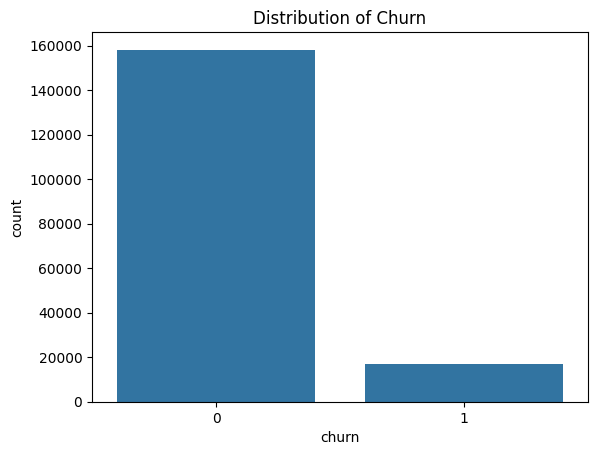

In [24]:
sns.countplot(x='churn', data=sales)
plt.title('Distribution of Churn')
plt.show()

In [67]:
sales['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    85086
kamkkxfxxuwbdslkwifmmcsiusiuosws    51503
ldkssxwpmemidmecebumciepifcamkci    37757
MISSING                               767
usapbepcfoloekilkwsdiboslwaxobdp       24
ewxeelcelemmiwuafmddpobolfuxioce       12
Name: count, dtype: int64

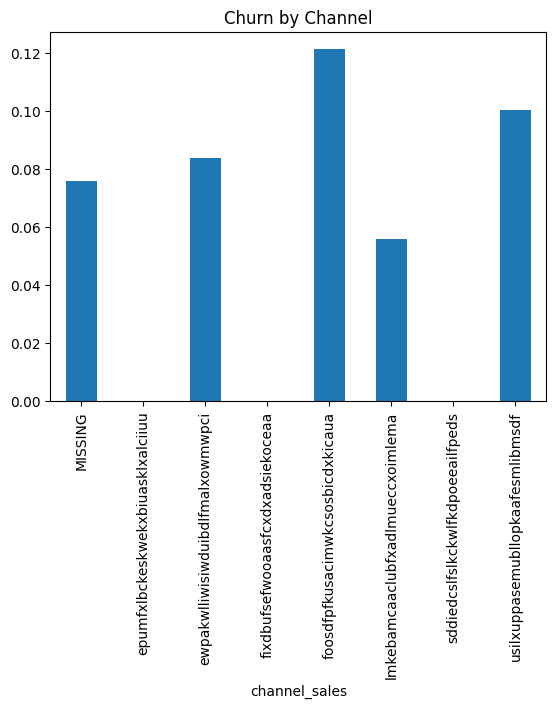

In [28]:
sales.groupby('channel_sales')['churn'].mean().plot(kind='bar')
plt.title('Churn by Channel')
plt.show()

In [21]:
sales['date_activ'] = pd.to_datetime(sales['date_activ'])
sales['date_end'] = pd.to_datetime(sales['date_end'])
sales['date_modif_prod'] = pd.to_datetime(sales['date_modif_prod'])
sales['date_renewal'] = pd.to_datetime(sales['date_renewal'])
sales['price_date'] = pd.to_datetime(sales['price_date'])

In [23]:
sales['channel_sales'] = sales['channel_sales'].astype('category')
sales['origin_up'] = sales['origin_up'].astype('category')

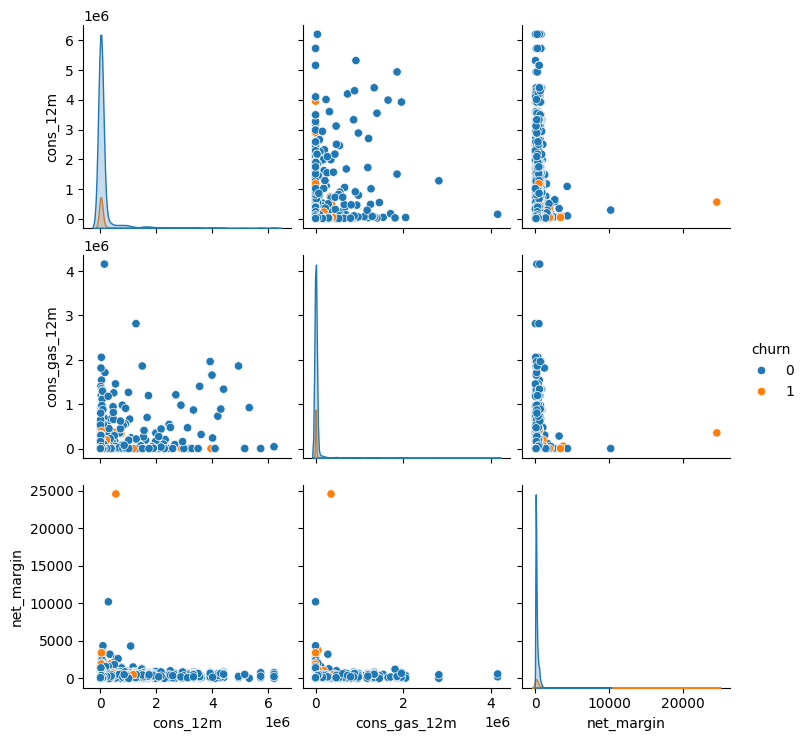

In [8]:
sns.pairplot(client[['cons_12m', 'cons_gas_12m', 'net_margin', 'churn']], hue='churn')
plt.show()

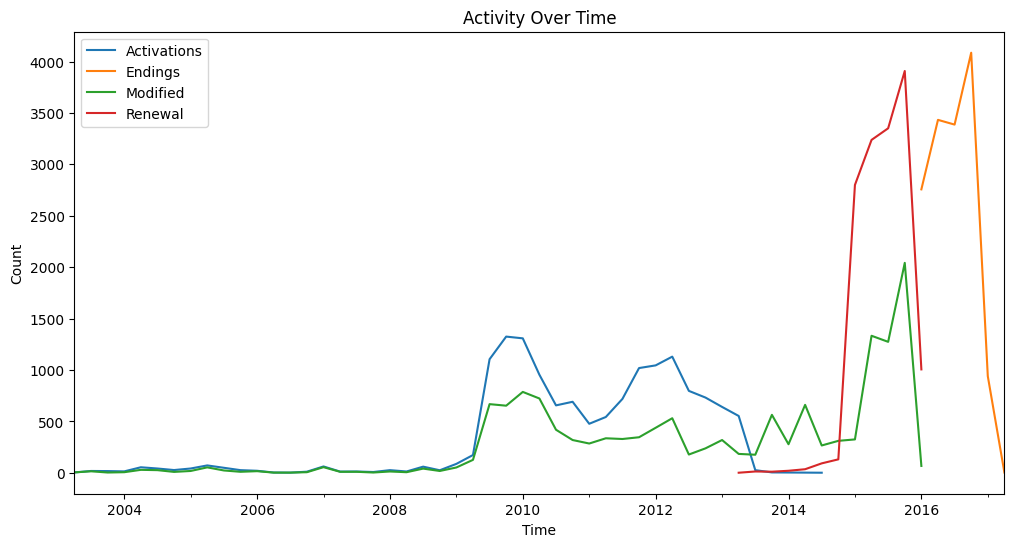

In [9]:
client['date_activ'].dt.to_period('Q').value_counts().sort_index().plot(kind='line', figsize=(12, 6), label='Activations')
client['date_end'].dt.to_period('Q').value_counts().sort_index().plot(kind='line', figsize=(12, 6), label='Endings')
client['date_modif_prod'].dt.to_period('Q').value_counts().sort_index().plot(kind='line', figsize=(12, 6), label='Modified')
client['date_renewal'].dt.to_period('Q').value_counts().sort_index().plot(kind='line', figsize=(12, 6), label='Renewal')
plt.title('Activity Over Time')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend()
plt.show()


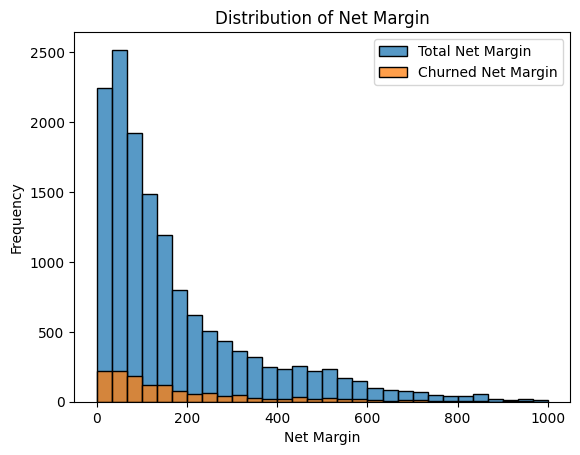

In [15]:
sns.histplot(client['net_margin'], bins=30, binrange=(0,1000), label = 'Total Net Margin')
sns.histplot(client[client['churn'] == 1]['net_margin'], bins=30, binrange=(0,1000), label = 'Churned Net Margin')
plt.title('Distribution of Net Margin')
plt.xlabel('Net Margin')
plt.ylabel('Frequency')
plt.legend()
plt.show()

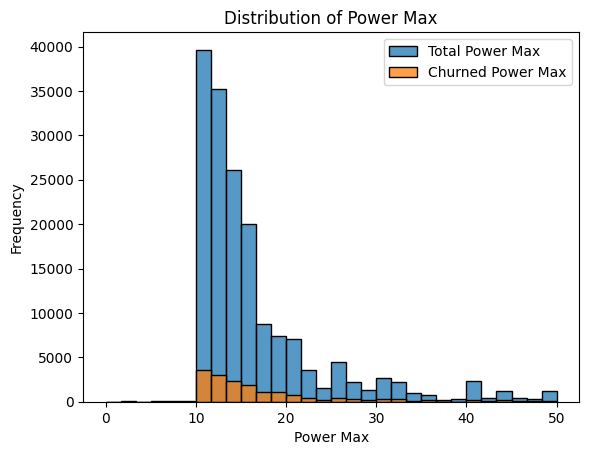

In [70]:
sns.histplot(sales['pow_max'], bins=30, binrange=(0, 50), label = 'Total Power Max')
sns.histplot(sales[sales['churn'] == 1]['pow_max'], bins=30, binrange=(0, 50), label = 'Churned Power Max')
plt.title('Distribution of Power Max')
plt.xlabel('Power Max')
plt.ylabel('Frequency')
plt.legend()
plt.show()


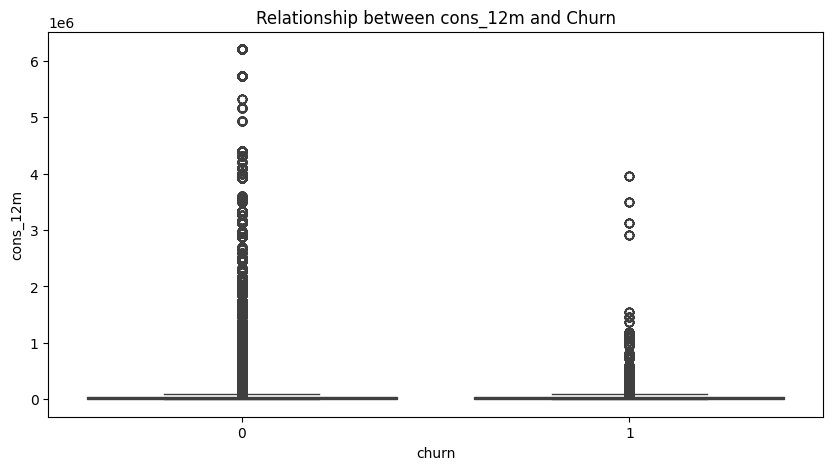

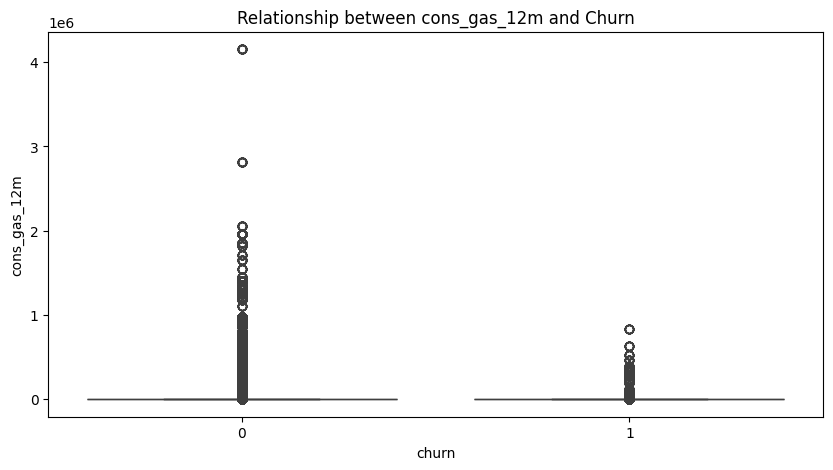

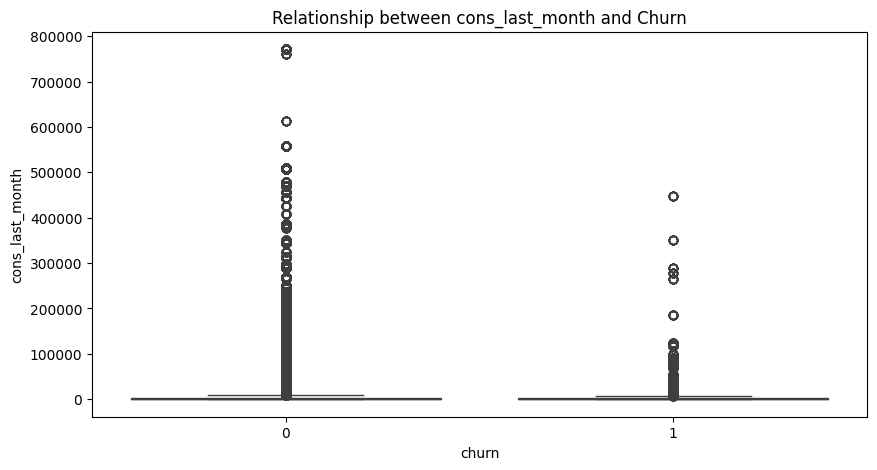

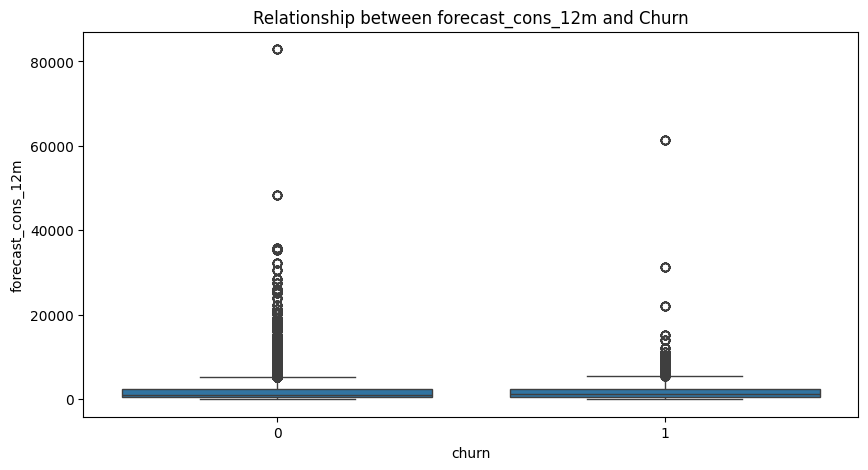

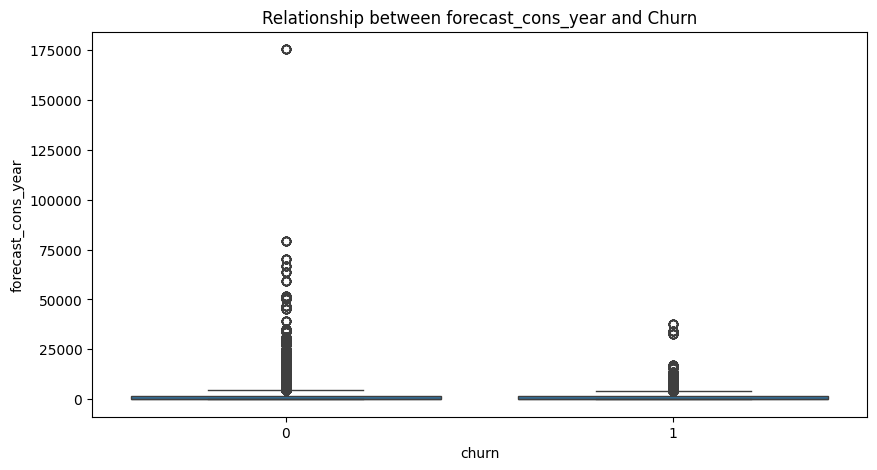

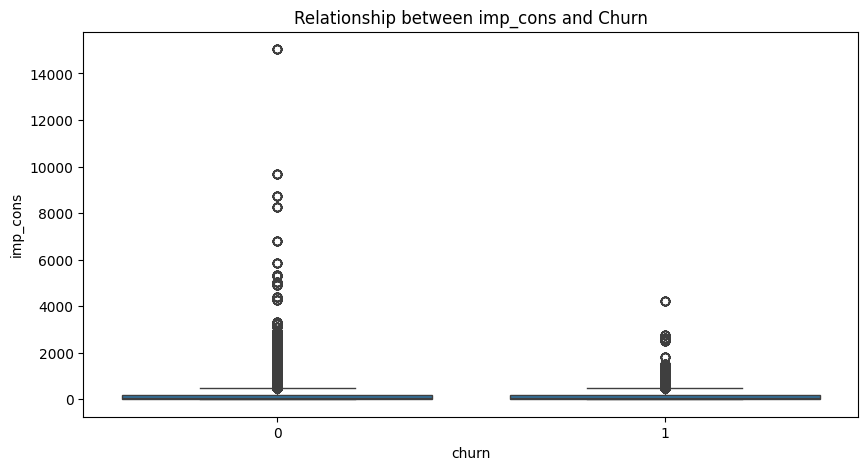

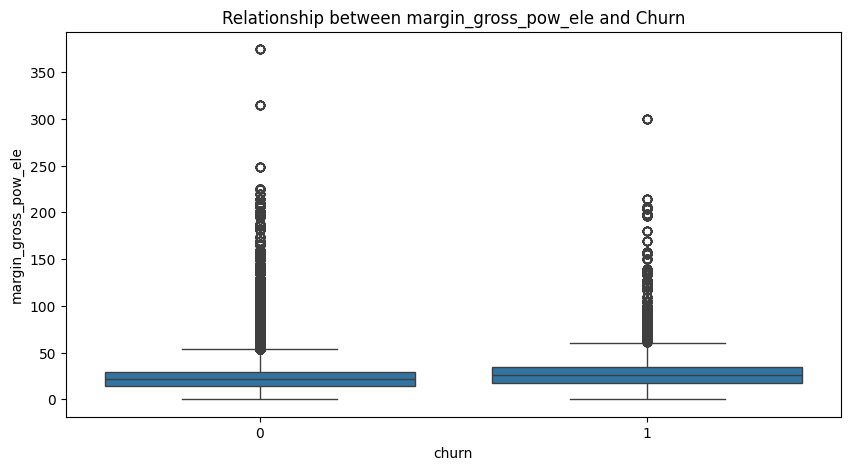

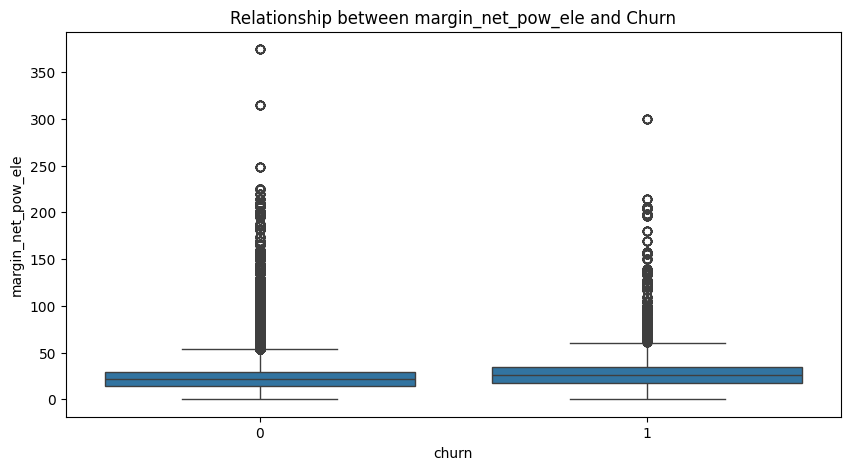

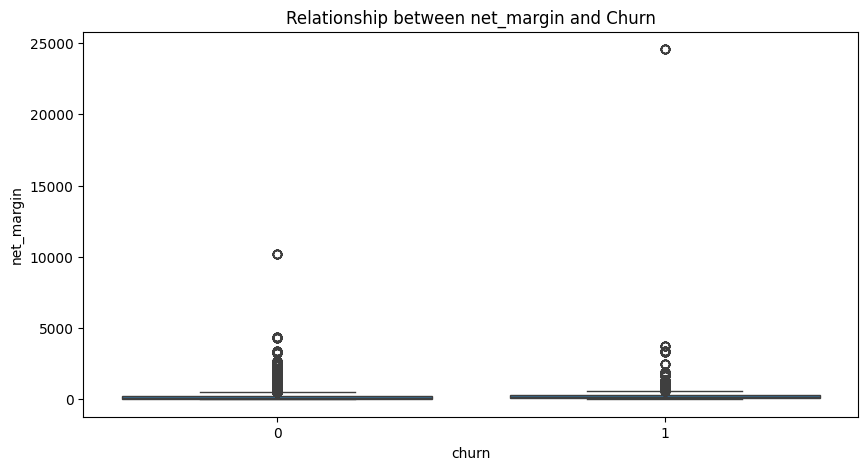

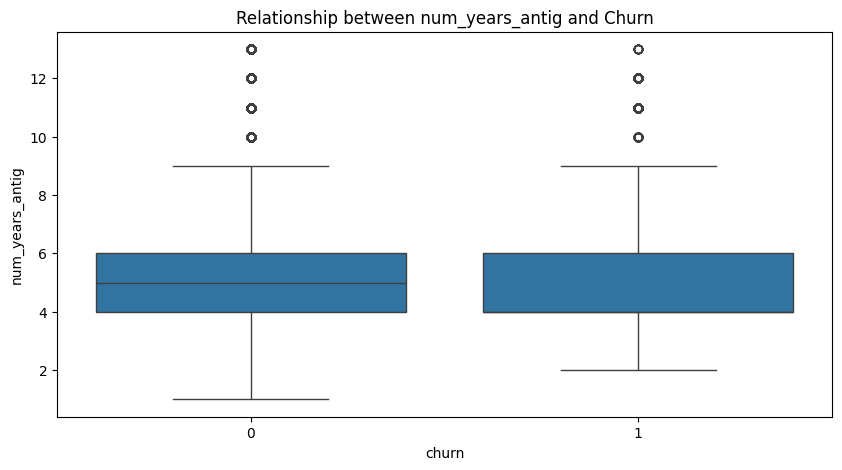

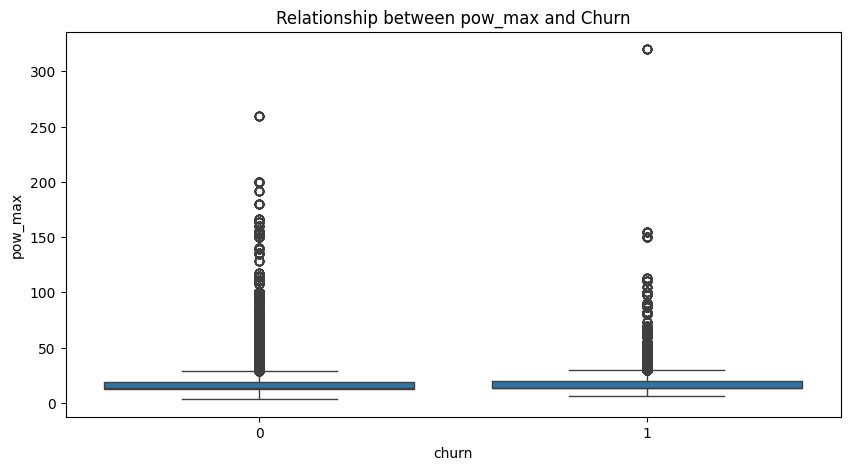

In [29]:
numerical_features = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
                      'forecast_cons_year', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele',
                      'net_margin', 'num_years_antig', 'pow_max']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='churn', y=feature, data=sales)
    plt.title(f'Relationship between {feature} and Churn')
    plt.show()

# Task 3 : Feature Engineering and Modelling

Feature engineering is enriching the data by performing various operations. It can involve performing operations and functions on present data to generate a new set of data which could help us further delve deep into data.

Modelling is performing machine learning methods in order to learn and predict dependencies of variables and extent of it.

In [55]:
sales['contract_duration'] = (sales['date_end'] - sales['date_activ']).dt.days
sales['contract_duration'] = sales['contract_duration'].astype('int')
sales.head()

,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,contract_duration
id,,,,,,,,,,,,,,,,,,,,,
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,...,17.25,0,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,2224
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,...,17.25,0,2015-02-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,2224
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,...,17.25,0,2015-03-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,2224
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,...,17.25,0,2015-04-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,2224
0002203ffbb812588b632b9e628cc38d,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010-01-19,2016-02-21,2010-01-19,2015-02-25,729.06,425,...,17.25,0,2015-05-01,0.128067,0.105842,0.073773,40.728885,24.437330,16.291555,2224


In [47]:
sorted_sales = sales.sort_values(by='price_date')

In [36]:
sales.columns

Index(['channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

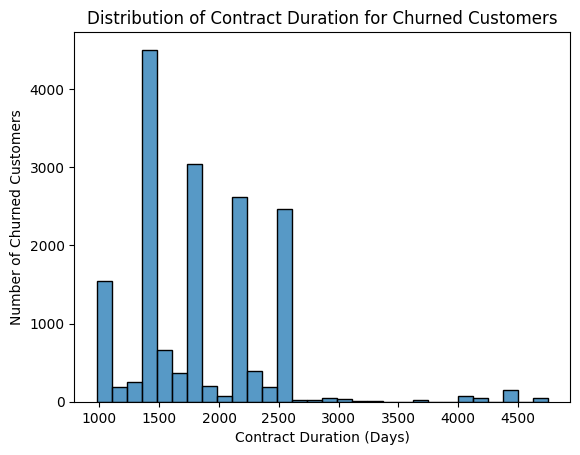

In [57]:
churned_customers = sales[sales['churn'] == 1]
contract_duration_churned = churned_customers[['contract_duration']]

sns.histplot(contract_duration_churned['contract_duration'], bins=30)
plt.title('Distribution of Contract Duration for Churned Customers')
plt.xlabel('Contract Duration (Days)')
plt.ylabel('Number of Churned Customers')
plt.show()


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
X = sales[['cons_12m', 'cons_gas_12m', 'cons_last_month',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'pow_max',
       'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']]
y = sales['churn']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [75]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[47400     0]
 [    3  5142]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47400
           1       1.00      1.00      1.00      5145

    accuracy                           1.00     52545
   macro avg       1.00      1.00      1.00     52545
weighted avg       1.00      1.00      1.00     52545



In [76]:
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(feature_importances)

                           Feature  Importance
0                         cons_12m    0.103144
6          forecast_meter_rent_12m    0.095621
14                      net_margin    0.095169
3                forecast_cons_12m    0.092200
12              margin_net_pow_ele    0.073572
11            margin_gross_pow_ele    0.071043
2                  cons_last_month    0.066602
7   forecast_price_energy_off_peak    0.061927
16                         pow_max    0.059665
10                        imp_cons    0.052293
4               forecast_cons_year    0.051476
15                 num_years_antig    0.032851
8       forecast_price_energy_peak    0.030549
1                     cons_gas_12m    0.022680
17              price_off_peak_var    0.021411
13                     nb_prod_act    0.014736
9      forecast_price_pow_off_peak    0.014162
19              price_mid_peak_var    0.012405
18                  price_peak_var    0.012127
20              price_off_peak_fix    0.007301
5         for